In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px
import plotly.graph_objects as go
warnings.filterwarnings('ignore')

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.inspection import permutation_importance
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import recall_score, confusion_matrix, ConfusionMatrixDisplay, precision_score, f1_score, accuracy_score, classification_report 

In [ ]:
dfdef = pd.read_csv('./data/combined_data.csv')
dfdef.head()

,Age,Avg Monthly GB Download,Avg Monthly Long Distance Charges,Churn Category,Churn Reason,Churn Score,City,CLTV,Contract,Country,...,Tenure in Months,Total Charges,Total Extra Data Charges,Total Long Distance Charges,Total Refunds,Total Revenue,Under 30,Unlimited Data,Zip Code,Churn
0,72,4,19.44,NaN,NaN,51,San Mateo,4849,Two Year,United States,...,25,2191.15,0,486.00,0.0,2677.15,0,1,94403,0
1,27,59,45.62,NaN,NaN,27,Sutter Creek,3715,Month-to-Month,United States,...,35,3418.20,0,1596.70,0.0,5014.90,1,1,95685,0
2,59,0,16.07,NaN,NaN,59,Santa Cruz,5092,Month-to-Month,United States,...,46,851.20,0,739.22,0.0,1590.42,0,0,95064,0
3,25,27,0.00,NaN,NaN,49,Brea,2068,One Year,United States,...,27,1246.40,30,0.00,0.0,1276.40,1,0,92823,0
4,31,21,17.22,Dissatisfaction,Network reliability,88,San Jose,4026,One Year,United States,...,58,3563.80,0,998.76,0.0,4562.56,0,1,95117,1


In [4]:
dfdef.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 52 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                7043 non-null   int64  
 1   Avg Monthly GB Download            7043 non-null   int64  
 2   Avg Monthly Long Distance Charges  7043 non-null   float64
 3   Churn Category                     1869 non-null   object 
 4   Churn Reason                       1869 non-null   object 
 5   Churn Score                        7043 non-null   int64  
 6   City                               7043 non-null   object 
 7   CLTV                               7043 non-null   int64  
 8   Contract                           7043 non-null   object 
 9   Country                            7043 non-null   object 
 10  Customer ID                        7043 non-null   object 
 11  Customer Status                    7043 non-null   objec

In [5]:
dfdef.isnull().sum()

Age                                     0
Avg Monthly GB Download                 0
Avg Monthly Long Distance Charges       0
Churn Category                       5174
Churn Reason                         5174
Churn Score                             0
City                                    0
CLTV                                    0
Contract                                0
Country                                 0
Customer ID                             0
Customer Status                         0
Dependents                              0
Device Protection Plan                  0
Gender                                  0
Internet Service                        0
Internet Type                        1526
Lat Long                                0
Latitude                                0
Longitude                               0
Married                                 0
Monthly Charge                          0
Multiple Lines                          0
Number of Dependents              

In [6]:
fig = px.histogram(
    dfdef,
    x="Churn",
    color="Contract",
    barmode="group",
    title="<b>Customer Contract Distribution by Churn</b>"
)

fig.update_layout(
    width=700,
    height=500,
    bargap=0.1,
    xaxis_title="Churn",
    yaxis_title="Count"
)

fig.show()

In [7]:
labels = dfdef['Payment Method'].value_counts().index
values = dfdef['Payment Method'].value_counts().values

# Create pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=0.3)])

fig.update_layout(
    title_text="<b>Payment Method Distribution</b>",
    width=600,
    height=500
)

fig.show()

In [8]:
color_map = {1: '#00CC96', 0: '#B6E880'}  #  1 = Yes, 0 = No

# Create histogram
fig = px.histogram(
    dfdef,
    x="Churn",
    color="Senior Citizen",
    title="<b>Churn Distribution by Senior Citizen Status</b>",
    color_discrete_map=color_map,
    barmode="group"
)

fig.update_layout(
    width=700,
    height=500,
    bargap=0.1,
    xaxis_title="Churn",
    yaxis_title="Count"
)

fig.show()

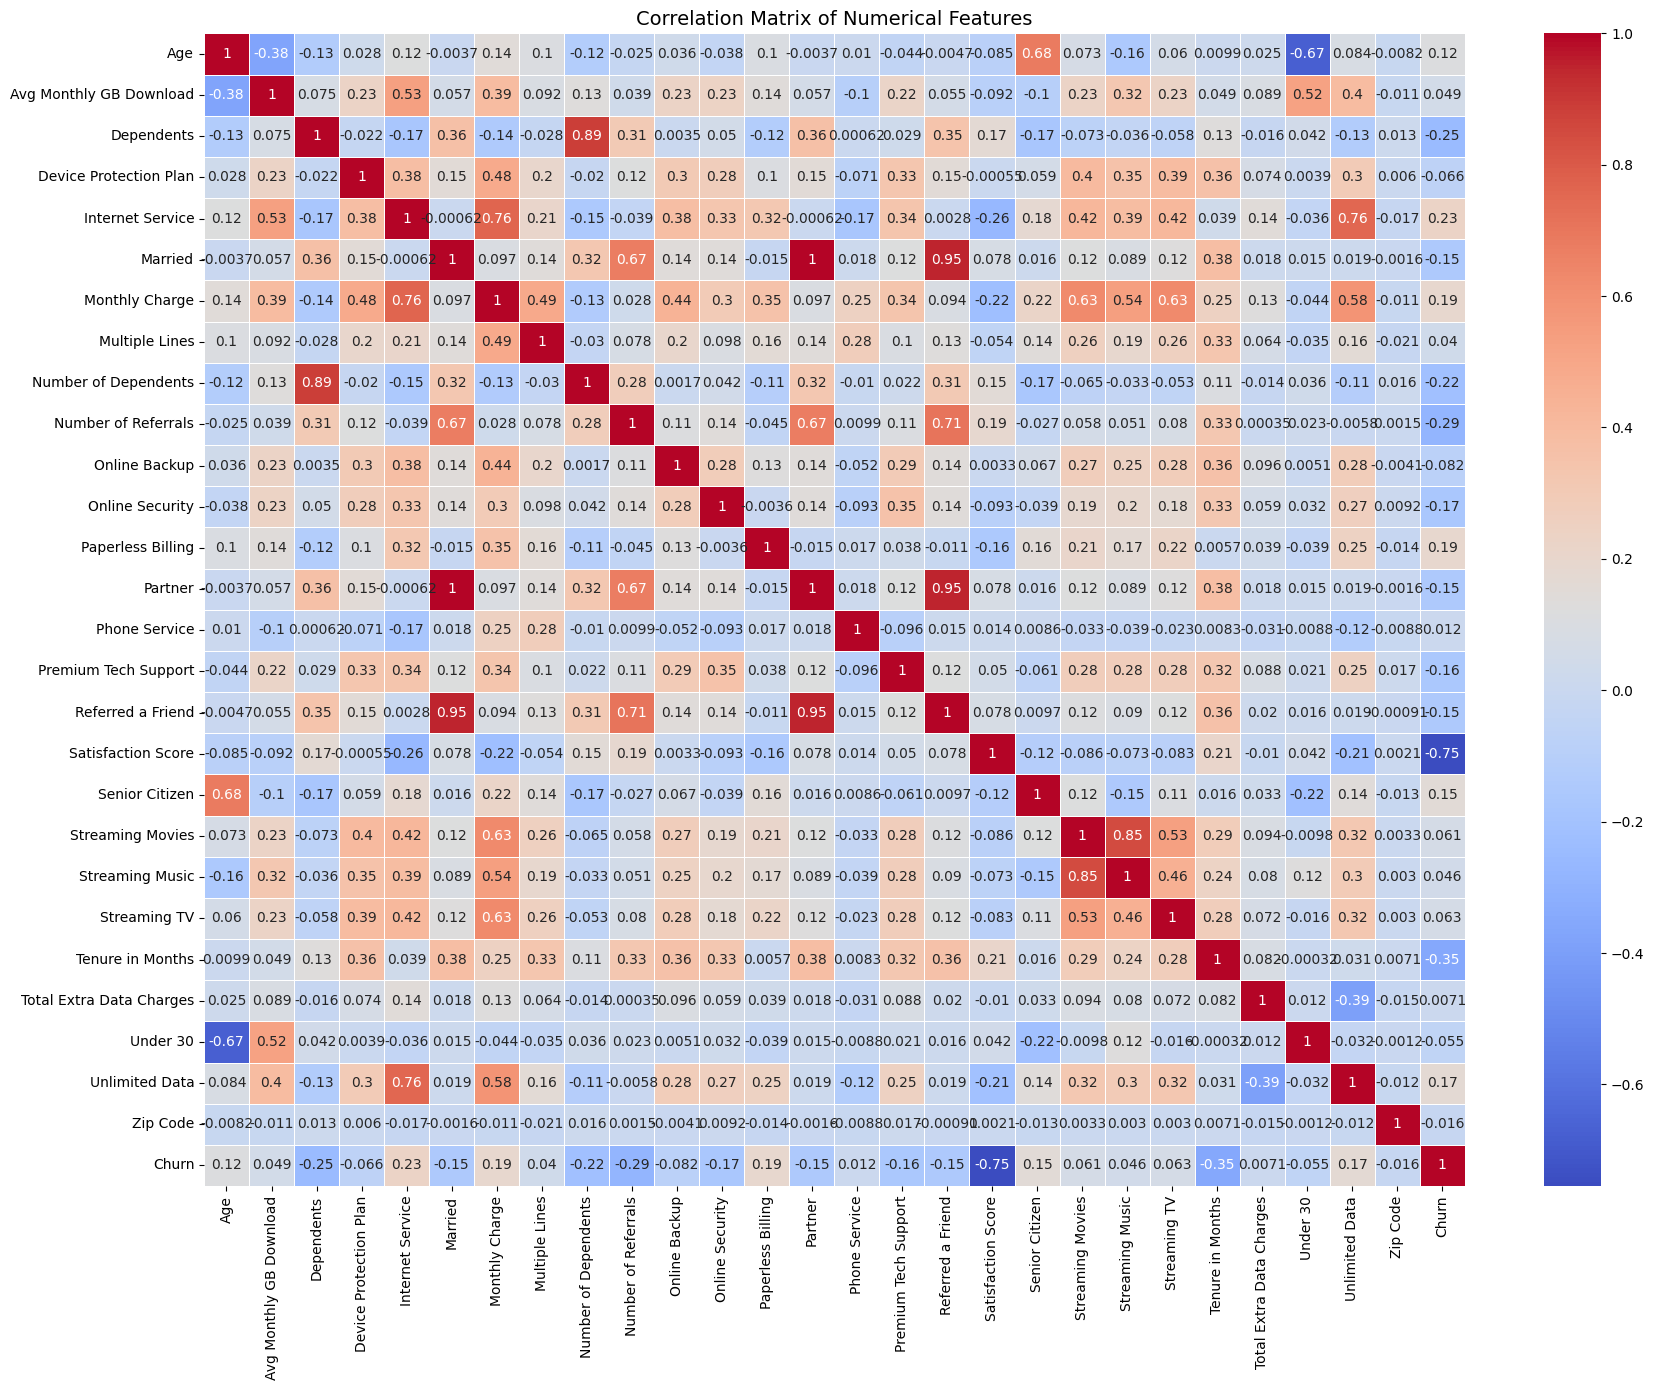

In [9]:
# Select only numerical columns
numeric_df = dfdef.select_dtypes(include=['int64', 'float64'])

# Drop columns with missing values
numeric_df = numeric_df.drop(columns=['Avg Monthly Long Distance Charges', 
                                      'Latitude', 'Longitude',
                                      'Total Charges', 'Total Long Distance Charges',
                                      'Total Refunds', 'Total Revenue'], errors='ignore')

# Drop known sparse columns explicitly
numeric_df = numeric_df.drop(columns=['Churn Score', 'CLTV', 'Population'], errors='ignore')

# Compute and plot correlation matrix
plt.figure(figsize=(18, 14))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features', fontsize=14)
plt.tight_layout()
plt.show()

In [10]:
remove_columns = [
    'Customer ID', 'Customer Status',
    'City', 'Country', 'Internet Service',
    'Lat Long', 'Latitude', 'Longitude',
    'Dependents', 'Married', 'Offer',
    'Population', 'Quarter', 'State',
    'Zip Code', 'Total Revenue', 'Satisfaction Score',
    'Churn Category', 'Churn Reason', 
    'Avg Monthly Long Distance Charges', 'CLTV',
    'Referred a Friend', 'Under 30', 'Churn Score'
]

df = dfdef.drop(columns=remove_columns)

print("Remaining columns:")
print(df.columns.tolist())
df.info()

Remaining columns:
['Age', 'Avg Monthly GB Download', 'Contract', 'Device Protection Plan', 'Gender', 'Internet Type', 'Monthly Charge', 'Multiple Lines', 'Number of Dependents', 'Number of Referrals', 'Online Backup', 'Online Security', 'Paperless Billing', 'Partner', 'Payment Method', 'Phone Service', 'Premium Tech Support', 'Senior Citizen', 'Streaming Movies', 'Streaming Music', 'Streaming TV', 'Tenure in Months', 'Total Charges', 'Total Extra Data Charges', 'Total Long Distance Charges', 'Total Refunds', 'Unlimited Data', 'Churn']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          7043 non-null   int64  
 1   Avg Monthly GB Download      7043 non-null   int64  
 2   Contract                     7043 non-null   object 
 3   Device Protection Plan       7043 non-null   int64  
 4 

In [11]:
df['Internet Type'] = df['Internet Type'].fillna('No')
df.isnull().sum()

Age                            0
Avg Monthly GB Download        0
Contract                       0
Device Protection Plan         0
Gender                         0
Internet Type                  0
Monthly Charge                 0
Multiple Lines                 0
Number of Dependents           0
Number of Referrals            0
Online Backup                  0
Online Security                0
Paperless Billing              0
Partner                        0
Payment Method                 0
Phone Service                  0
Premium Tech Support           0
Senior Citizen                 0
Streaming Movies               0
Streaming Music                0
Streaming TV                   0
Tenure in Months               0
Total Charges                  0
Total Extra Data Charges       0
Total Long Distance Charges    0
Total Refunds                  0
Unlimited Data                 0
Churn                          0
dtype: int64

In [12]:
df.describe()

,Age,Avg Monthly GB Download,Device Protection Plan,Monthly Charge,Multiple Lines,Number of Dependents,Number of Referrals,Online Backup,Online Security,Paperless Billing,...,Streaming Movies,Streaming Music,Streaming TV,Tenure in Months,Total Charges,Total Extra Data Charges,Total Long Distance Charges,Total Refunds,Unlimited Data,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,46.509726,20.515405,0.343888,64.761692,0.421837,0.468692,1.951867,0.344881,0.286668,0.592219,...,0.387903,0.353259,0.384353,32.386767,2280.381264,6.860713,749.099262,1.962182,0.673719,0.265370
std,16.750352,20.418940,0.475038,30.090047,0.493888,0.962802,3.001199,0.475363,0.452237,0.491457,...,0.487307,0.478016,0.486477,24.542061,2266.220462,25.104978,846.660055,7.902614,0.468885,0.441561
min,19.000000,0.000000,0.000000,18.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,18.800000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,3.000000,0.000000,35.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,9.000000,400.150000,0.000000,70.545000,0.000000,0.000000,0.000000
50%,46.000000,17.000000,0.000000,70.350000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,29.000000,1394.550000,0.000000,401.440000,0.000000,1.000000,0.000000
75%,60.000000,27.000000,1.000000,89.850000,1.000000,0.000000,3.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,55.000000,3786.600000,0.000000,1191.100000,0.000000,1.000000,1.000000
max,80.000000,85.000000,1.000000,118.750000,1.000000,9.000000,11.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,72.000000,8684.800000,150.000000,3564.720000,49.790000,1.000000,1.000000


In [13]:
df_encoded = df.copy()

for col in df_encoded.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))

print(df_encoded.dtypes)

Age                              int64
Avg Monthly GB Download          int64
Contract                         int64
Device Protection Plan           int64
Gender                           int64
Internet Type                    int64
Monthly Charge                 float64
Multiple Lines                   int64
Number of Dependents             int64
Number of Referrals              int64
Online Backup                    int64
Online Security                  int64
Paperless Billing                int64
Partner                          int64
Payment Method                   int64
Phone Service                    int64
Premium Tech Support             int64
Senior Citizen                   int64
Streaming Movies                 int64
Streaming Music                  int64
Streaming TV                     int64
Tenure in Months                 int64
Total Charges                  float64
Total Extra Data Charges         int64
Total Long Distance Charges    float64
Total Refunds            

In [14]:
df_encoded.head()

,Age,Avg Monthly GB Download,Contract,Device Protection Plan,Gender,Internet Type,Monthly Charge,Multiple Lines,Number of Dependents,Number of Referrals,...,Streaming Movies,Streaming Music,Streaming TV,Tenure in Months,Total Charges,Total Extra Data Charges,Total Long Distance Charges,Total Refunds,Unlimited Data,Churn
0,72,4,2,1,0,2,88.40,0,0,1,...,1,1,0,25,2191.15,0,486.00,0.0,1,0
1,27,59,0,1,1,2,95.50,1,0,0,...,0,0,1,35,3418.20,0,1596.70,0.0,1,0
2,59,0,0,0,1,3,19.60,0,0,3,...,0,0,0,46,851.20,0,739.22,0.0,0,0
3,25,27,1,1,1,1,45.85,0,0,3,...,1,1,0,27,1246.40,30,0.00,0.0,0,0
4,31,21,1,1,1,0,60.30,0,0,1,...,0,0,0,58,3563.80,0,998.76,0.0,1,1


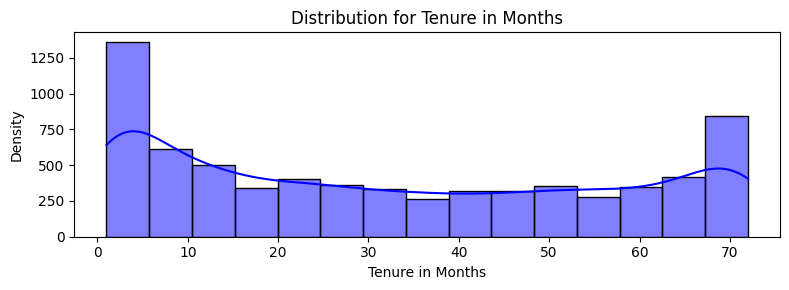

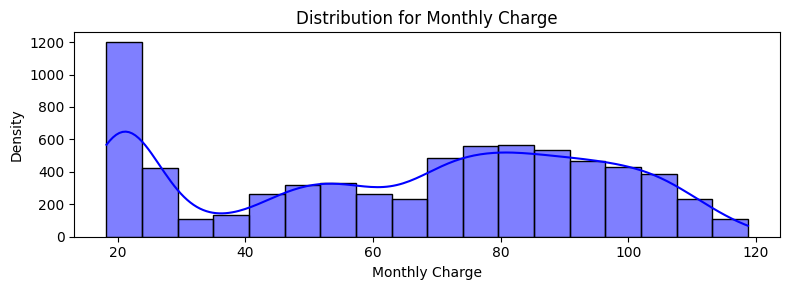

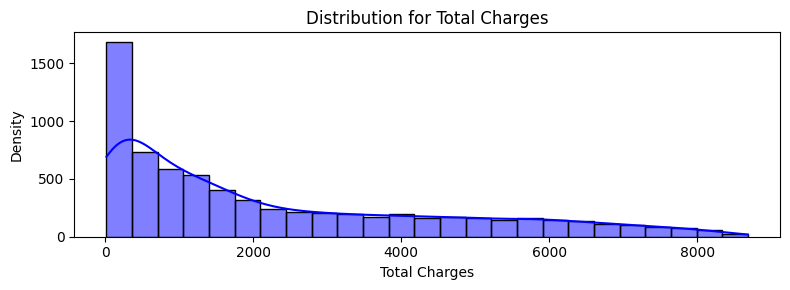

In [15]:
#Distriution plot function
def distplot(feature, frame, color='blue'):
    plt.figure(figsize=(8, 3))
    plt.title(f"Distribution for {feature}")
    sns.histplot(frame[feature], kde=True, color=color)
    plt.xlabel(feature)
    plt.ylabel("Density")
    plt.tight_layout()
    plt.show()

# Numerical features to plot
num_cols = ["Tenure in Months", "Monthly Charge", "Total Charges"]

# Plot distributions
for feat in num_cols:
    distplot(feat, df_encoded)

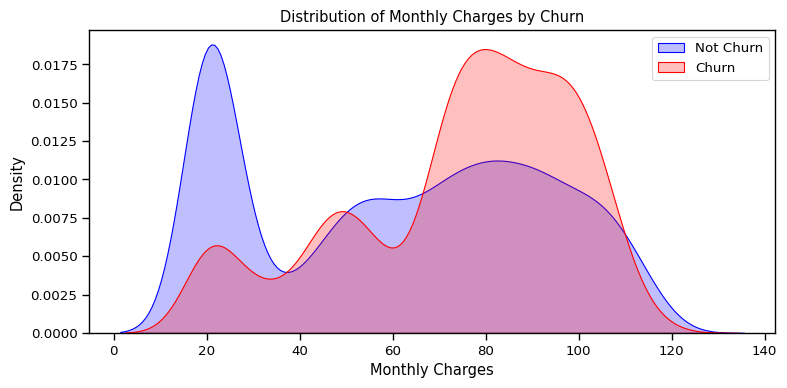

In [16]:
# Set style
sns.set_context("paper", font_scale=1.1)

# Create figure
plt.figure(figsize=(8, 4))
plt.title("Distribution of Monthly Charges by Churn")
plt.xlabel("Monthly Charges")
plt.ylabel("Density")

# KDE plots for churn = No and Yes
sns.kdeplot(
    data=df_encoded[df_encoded["Churn"] == 0],
    x="Monthly Charge",
    shade=True,
    color="blue",
    label="Not Churn"
)
sns.kdeplot(
    data=df_encoded[df_encoded["Churn"] == 1],
    x="Monthly Charge",
    shade=True,
    color="red",
    label="Churn"
)

# Legend and layout
plt.legend(loc="upper right")
plt.tight_layout()
plt.show()


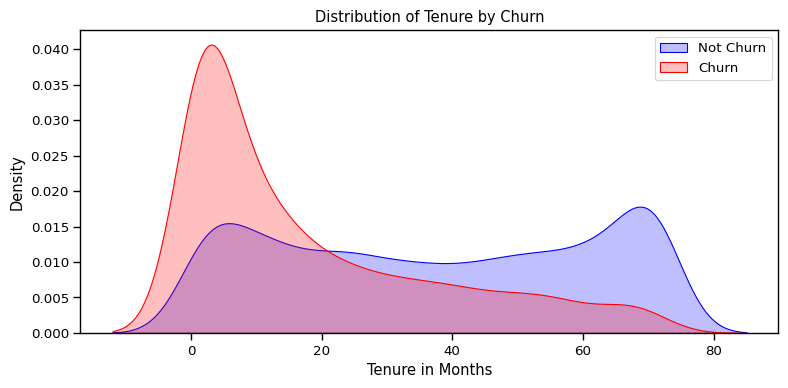

In [17]:
# Set plot context
sns.set_context("paper", font_scale=1.1)

# Create figure
plt.figure(figsize=(8, 4))
plt.title("Distribution of Tenure by Churn")
plt.xlabel("Tenure in Months")
plt.ylabel("Density")

# KDE plots
sns.kdeplot(
    data=df_encoded[df_encoded["Churn"] == 0],
    x="Tenure in Months",
    shade=True,
    color="blue",
    label="Not Churn"
)
sns.kdeplot(
    data=df_encoded[df_encoded["Churn"] == 1],
    x="Tenure in Months",
    shade=True,
    color="red",
    label="Churn"
)

# Add legend and show
plt.legend(loc="upper right")
plt.tight_layout()
plt.show()


Churn                          1.000000
Monthly Charge                 0.193356
Paperless Billing              0.191825
Unlimited Data                 0.166545
Senior Citizen                 0.150889
Age                            0.115760
Streaming TV                   0.063228
Streaming Movies               0.061382
Avg Monthly GB Download        0.048868
Streaming Music                0.045587
Multiple Lines                 0.040102
Phone Service                  0.011942
Total Extra Data Charges       0.007139
Gender                        -0.008612
Total Refunds                 -0.033709
Internet Type                 -0.050694
Device Protection Plan        -0.066160
Online Backup                 -0.082255
Payment Method                -0.135100
Partner                       -0.150448
Premium Tech Support          -0.164674
Online Security               -0.171226
Total Charges                 -0.198546
Number of Dependents          -0.218780
Total Long Distance Charges   -0.223756


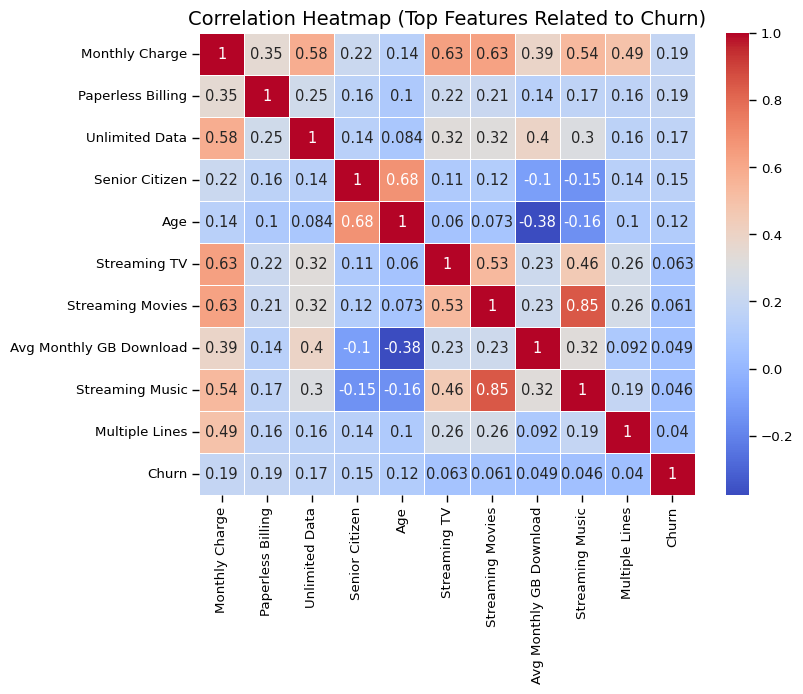

In [18]:
churn_corr = df_encoded.corr()['Churn'].sort_values(ascending=False)
print(churn_corr)

top_features = churn_corr[1:11].index

plt.figure(figsize=(8, 6))
sns.heatmap(df_encoded[top_features.tolist() + ['Churn']].corr(), 
            annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap (Top Features Related to Churn)', fontsize=14)
plt.show()

In [19]:
scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(df_encoded), columns=df_encoded.columns)

X = df_encoded.drop(['Churn'], axis=1)
y = df_encoded[['Churn']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y['Churn'])

In [20]:
# Use L1 penalty for feature selection
l1_lr = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)
l1_lr.fit(X_train, y_train)

# Get selected features
selected_features = X_train.columns[l1_lr.coef_[0] != 0]
print("Selected features:", selected_features.tolist())

Selected features: ['Age', 'Avg Monthly GB Download', 'Contract', 'Gender', 'Internet Type', 'Monthly Charge', 'Multiple Lines', 'Number of Dependents', 'Number of Referrals', 'Online Backup', 'Online Security', 'Paperless Billing', 'Partner', 'Payment Method', 'Phone Service', 'Premium Tech Support', 'Senior Citizen', 'Streaming Movies', 'Streaming Music', 'Streaming TV', 'Tenure in Months', 'Total Charges', 'Total Extra Data Charges', 'Total Long Distance Charges', 'Total Refunds', 'Unlimited Data']


Accuracy: 0.7785663591199432

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.94      0.86      1035
           1       0.66      0.34      0.45       374

    accuracy                           0.78      1409
   macro avg       0.73      0.64      0.66      1409
weighted avg       0.76      0.78      0.75      1409



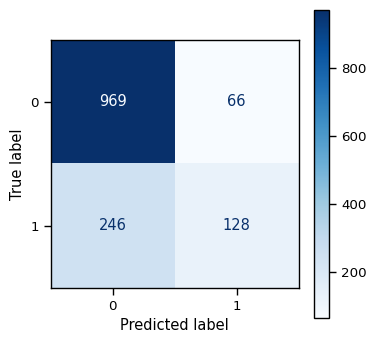

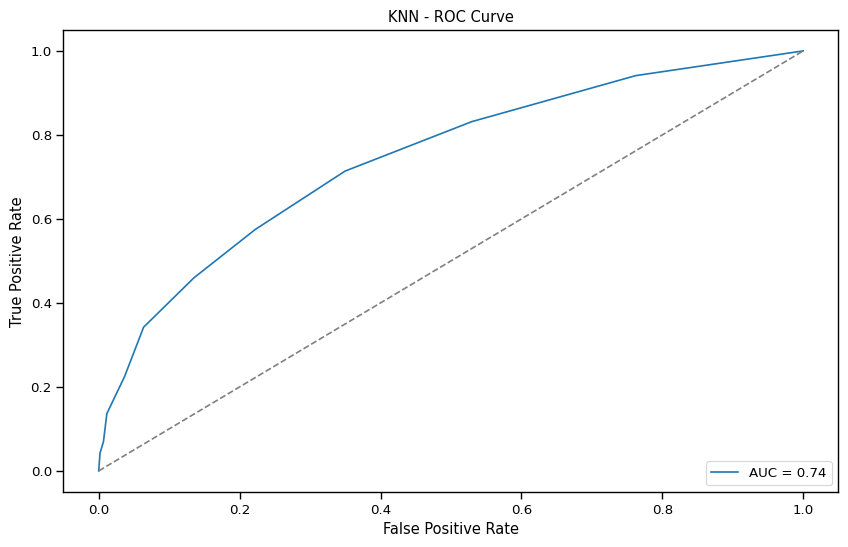

KS Statistic (KNN): 0.3641
Threshold at KS: 0.3000


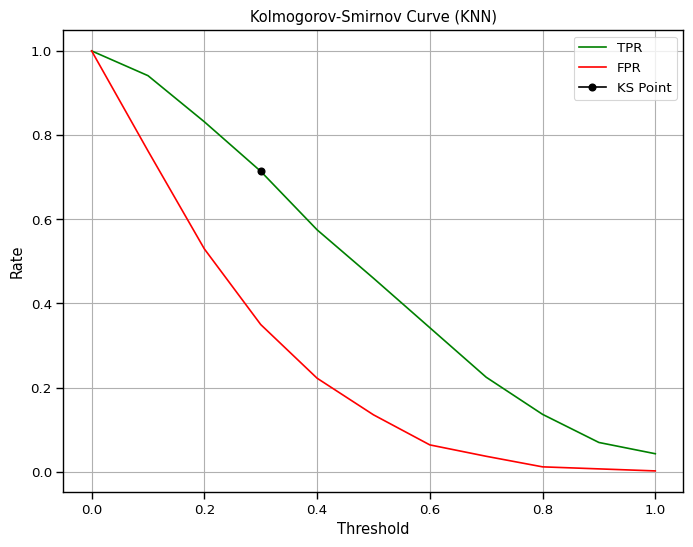

In [21]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))

cm = confusion_matrix(y_test, y_pred_knn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax=plt.subplots(figsize=(4, 4))
disp.plot(cmap='Blues',ax=ax)

y_proba_knn = knn.predict_proba(X_test)[:, 1]
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_proba_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

plt.figure(figsize=(10, 6))
plt.plot(fpr_knn, tpr_knn, label=f'AUC = {roc_auc_knn:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('KNN - ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_proba_knn)

ks_statistic_knn = max(tpr_knn - fpr_knn)
ks_threshold_knn = thresholds_knn[np.argmax(tpr_knn - fpr_knn)]

print(f"KS Statistic (KNN): {ks_statistic_knn:.4f}")
print(f"Threshold at KS: {ks_threshold_knn:.4f}")

plt.figure(figsize=(8,6))
plt.plot(thresholds_knn, tpr_knn, label='TPR', color='green')
plt.plot(thresholds_knn, fpr_knn, label='FPR', color='red')
plt.plot([ks_threshold_knn], [tpr_knn[np.argmax(tpr_knn - fpr_knn)]], marker='o', color='black', label='KS Point')
plt.title("Kolmogorov-Smirnov Curve (KNN)")
plt.xlabel("Threshold")
plt.ylabel("Rate")
plt.legend()
plt.grid(True)
plt.show()

Accuracy: 0.7835344215755855

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.97      0.87      1035
           1       0.75      0.28      0.41       374

    accuracy                           0.78      1409
   macro avg       0.77      0.62      0.64      1409
weighted avg       0.78      0.78      0.74      1409



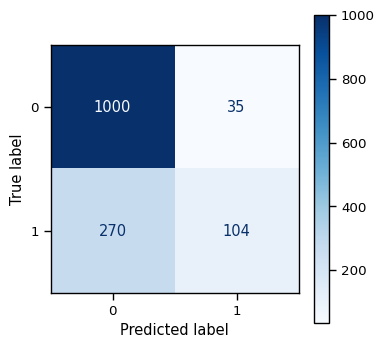

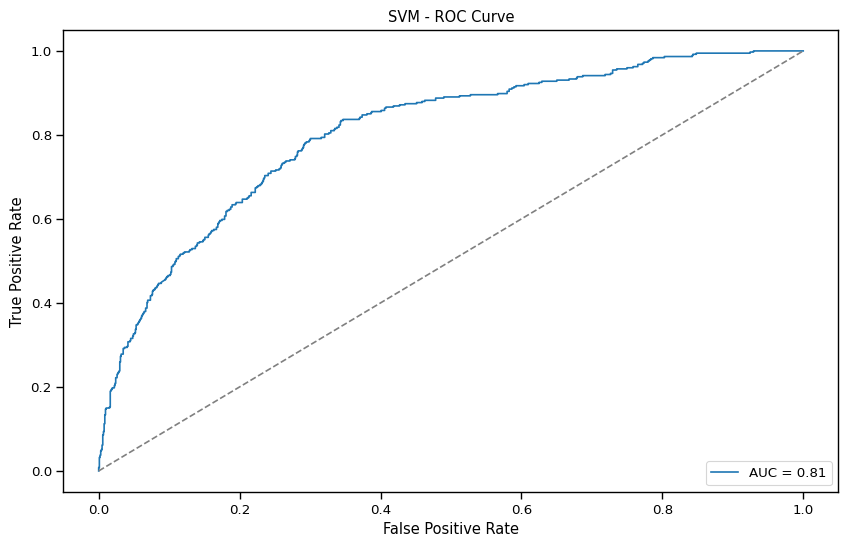

KS Statistic (SVM): 0.4910
Threshold at KS: 0.1791


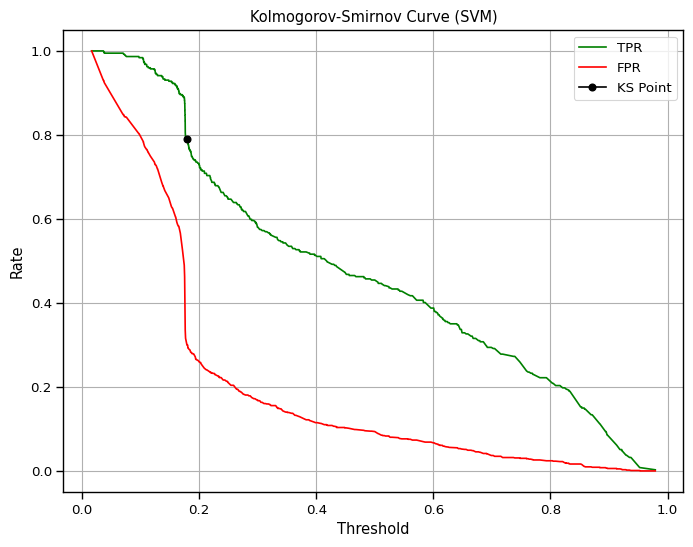

In [22]:
svm = SVC(kernel='rbf', C=10.0, random_state=42, probability=True)
svm.fit(X_train, y_train)

y_pred_svm = svm.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))

cm = confusion_matrix(y_test, y_pred_svm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax=plt.subplots(figsize=(4, 4))
disp.plot(cmap='Blues',ax=ax)

y_proba_svm = svm.predict_proba(X_test)[:, 1]
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_proba_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

plt.figure(figsize=(10, 6))
plt.plot(fpr_svm, tpr_svm, label=f'AUC = {roc_auc_svm:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('SVM - ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

fpr_svm, tpr_svm, thresholds_knn = roc_curve(y_test, y_proba_svm)

ks_statistic_svm = max(tpr_svm - fpr_svm)
ks_threshold_svm = thresholds_knn[np.argmax(tpr_svm - fpr_svm)]

print(f"KS Statistic (SVM): {ks_statistic_svm:.4f}")
print(f"Threshold at KS: {ks_threshold_svm:.4f}")

plt.figure(figsize=(8,6))
plt.plot(thresholds_knn, tpr_svm, label='TPR', color='green')
plt.plot(thresholds_knn, fpr_svm, label='FPR', color='red')
plt.plot([ks_threshold_svm], [tpr_svm[np.argmax(tpr_svm - fpr_svm)]], marker='o', color='black', label='KS Point')
plt.title("Kolmogorov-Smirnov Curve (SVM)")
plt.xlabel("Threshold")
plt.ylabel("Rate")
plt.legend()
plt.grid(True)
plt.show()

Accuracy: 0.8410220014194464

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.93      0.90      1035
           1       0.75      0.60      0.67       374

    accuracy                           0.84      1409
   macro avg       0.81      0.76      0.78      1409
weighted avg       0.83      0.84      0.83      1409



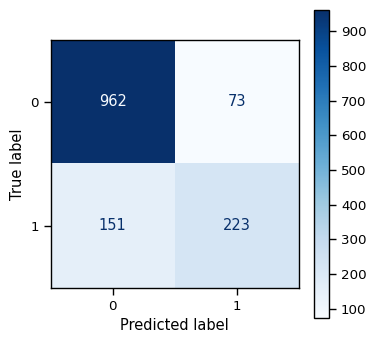

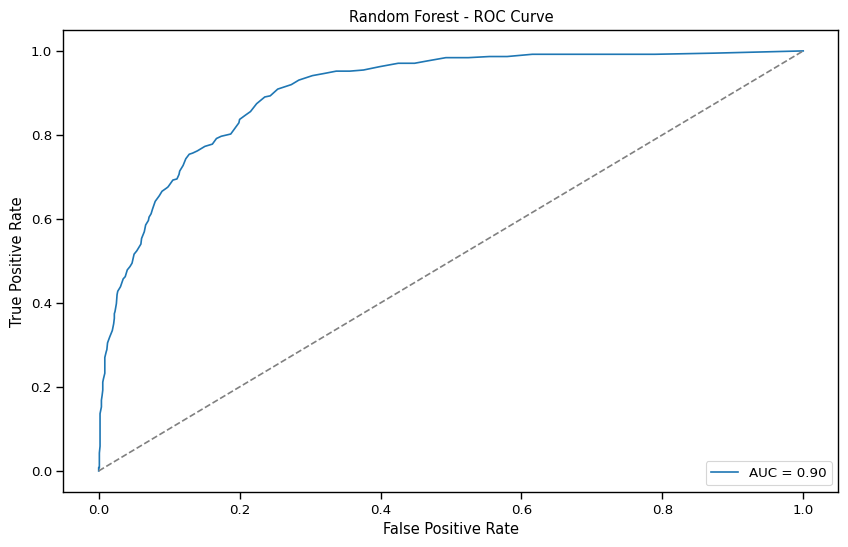

KS Statistic (Random Forest): 0.6550
Threshold at KS: 0.2100


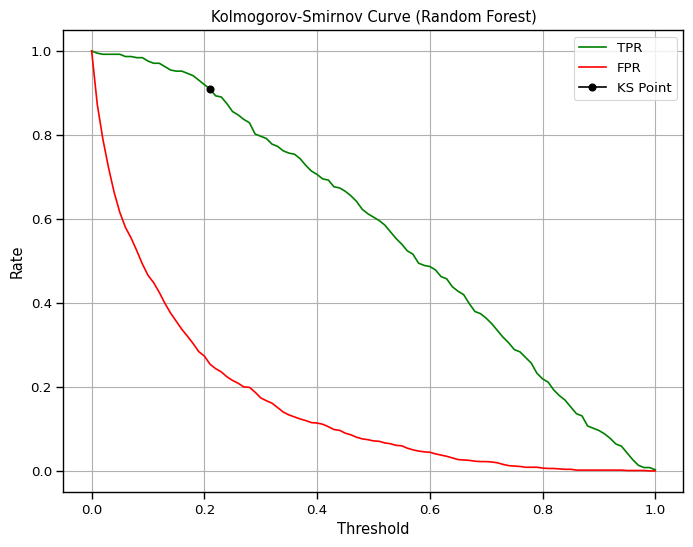

In [23]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax=plt.subplots(figsize=(4, 4))
disp.plot(cmap='Blues',ax=ax)

y_proba_rf = rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(10, 6))
plt.plot(fpr_rf, tpr_rf, label=f'AUC = {roc_auc_rf:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('Random Forest - ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_proba_rf)

ks_statistic_rf = max(tpr_rf - fpr_rf)
ks_threshold_rf = thresholds_rf[np.argmax(tpr_rf - fpr_rf)]

print(f"KS Statistic (Random Forest): {ks_statistic_rf:.4f}")
print(f"Threshold at KS: {ks_threshold_rf:.4f}")

plt.figure(figsize=(8,6))
plt.plot(thresholds_rf, tpr_rf, label='TPR', color='green')
plt.plot(thresholds_rf, fpr_rf, label='FPR', color='red')
plt.plot([ks_threshold_rf], [tpr_rf[np.argmax(tpr_rf - fpr_rf)]], marker='o', color='black', label='KS Point')
plt.title("Kolmogorov-Smirnov Curve (Random Forest)")
plt.xlabel("Threshold")
plt.ylabel("Rate")
plt.legend()
plt.grid(True)
plt.show()

Accuracy: 0.7814052519517388

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.86      0.85      1035
           1       0.59      0.56      0.57       374

    accuracy                           0.78      1409
   macro avg       0.72      0.71      0.71      1409
weighted avg       0.78      0.78      0.78      1409



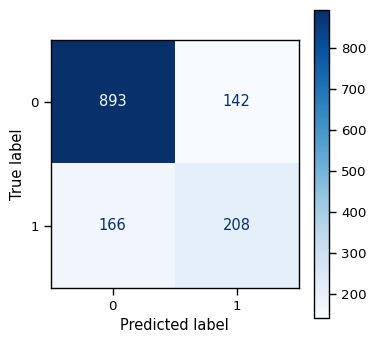

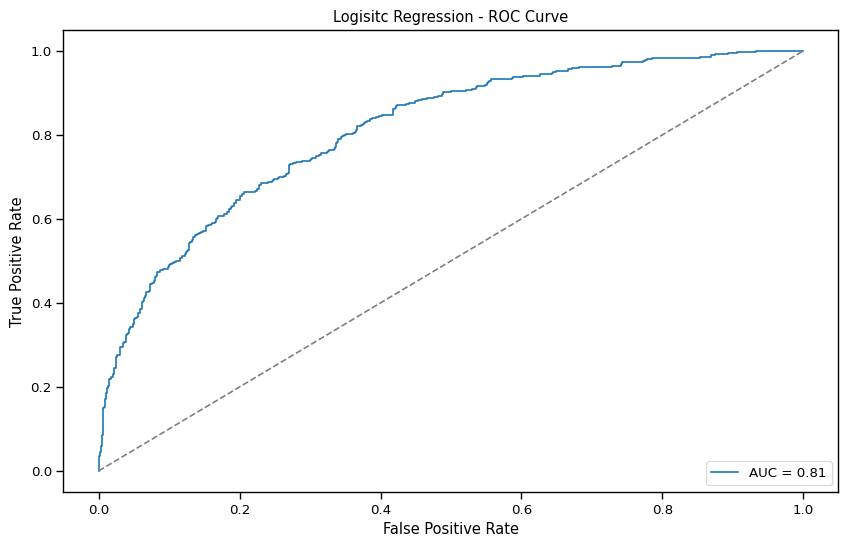

KS Statistic (Logistic Regression): 0.4584
Threshold at KS: 0.3493


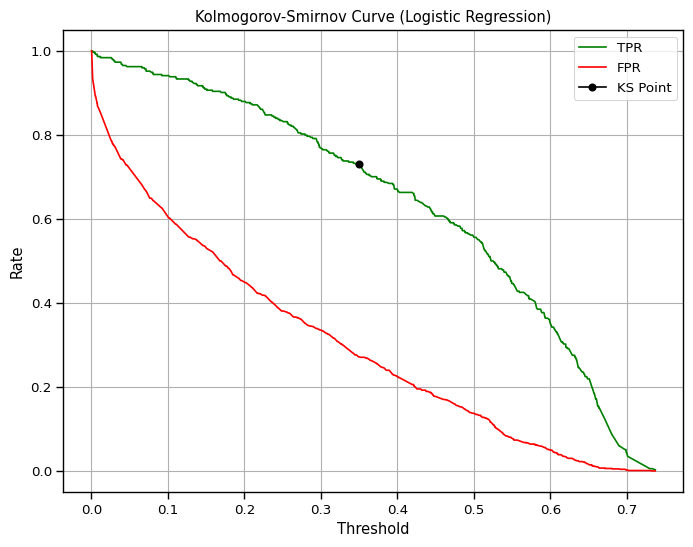

In [24]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))

cm = confusion_matrix(y_test, y_pred_lr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax=plt.subplots(figsize=(4, 4))
disp.plot(cmap='Blues',ax=ax)

y_proba_lr = lr.predict_proba(X_test)[:, 1]
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure(figsize=(10, 6))
plt.plot(fpr_lr, tpr_lr, label=f'AUC = {roc_auc_lr:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('Logisitc Regression - ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

fpr_lr, tpr_lr, thresholds_rf = roc_curve(y_test, y_proba_lr)

ks_statistic_lr = max(tpr_lr - fpr_lr)
ks_threshold_lr = thresholds_rf[np.argmax(tpr_lr - fpr_lr)]

print(f"KS Statistic (Logistic Regression): {ks_statistic_lr:.4f}")
print(f"Threshold at KS: {ks_threshold_lr:.4f}")

plt.figure(figsize=(8,6))
plt.plot(thresholds_rf, tpr_lr, label='TPR', color='green')
plt.plot(thresholds_rf, fpr_lr, label='FPR', color='red')
plt.plot([ks_threshold_lr], [tpr_lr[np.argmax(tpr_lr - fpr_lr)]], marker='o', color='black', label='KS Point')
plt.title("Kolmogorov-Smirnov Curve (Logistic Regression)")
plt.xlabel("Threshold")
plt.ylabel("Rate")
plt.legend()
plt.grid(True)
plt.show()

Accuracy: 0.7771469127040455

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.86      0.85      1035
           1       0.59      0.55      0.57       374

    accuracy                           0.78      1409
   macro avg       0.71      0.70      0.71      1409
weighted avg       0.77      0.78      0.77      1409



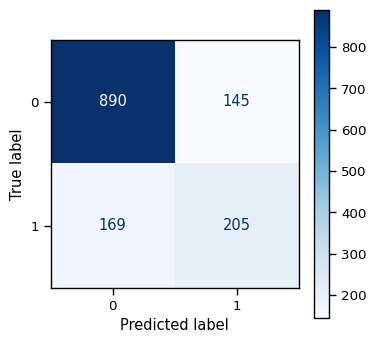

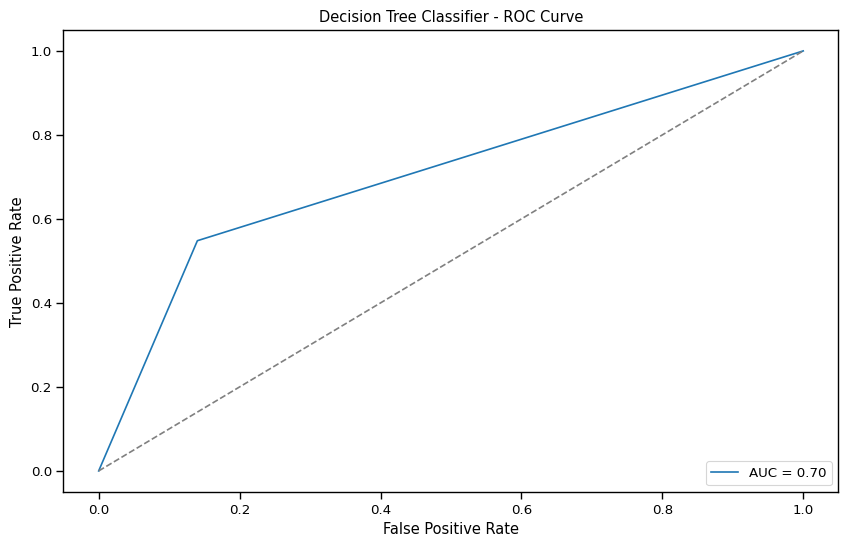

KS Statistic (Decision Tree): 0.4080
Threshold at KS: 1.0000


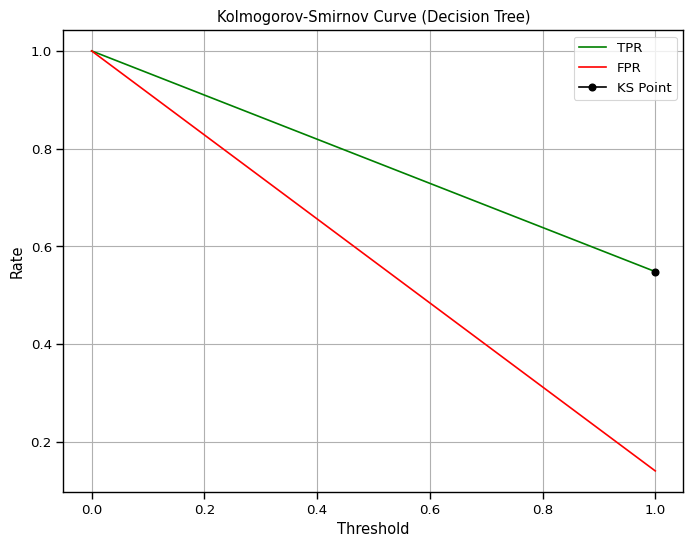

In [25]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))

cm = confusion_matrix(y_test, y_pred_dt)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax=plt.subplots(figsize=(4, 4))
disp.plot(cmap='Blues',ax=ax)

y_proba_dt = dt.predict_proba(X_test)[:, 1]
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_proba_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

plt.figure(figsize=(10, 6))
plt.plot(fpr_dt, tpr_dt, label=f'AUC = {roc_auc_dt:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('Decision Tree Classifier - ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_proba_dt)

ks_statistic_dt = max(tpr_dt - fpr_dt)
ks_threshold_dt = thresholds_dt[np.argmax(tpr_dt - fpr_dt)]

print(f"KS Statistic (Decision Tree): {ks_statistic_dt:.4f}")
print(f"Threshold at KS: {ks_threshold_dt:.4f}")

plt.figure(figsize=(8,6))
plt.plot(thresholds_dt, tpr_dt, label='TPR', color='green')
plt.plot(thresholds_dt, fpr_dt, label='FPR', color='red')
plt.plot([ks_threshold_dt], [tpr_dt[np.argmax(tpr_dt - fpr_dt)]], marker='o', color='black', label='KS Point')
plt.title("Kolmogorov-Smirnov Curve (Decision Tree)")
plt.xlabel("Threshold")
plt.ylabel("Rate")
plt.legend()
plt.grid(True)
plt.show()

Accuracy: 0.8282469836763662

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.90      0.88      1035
           1       0.69      0.64      0.66       374

    accuracy                           0.83      1409
   macro avg       0.78      0.77      0.77      1409
weighted avg       0.82      0.83      0.83      1409



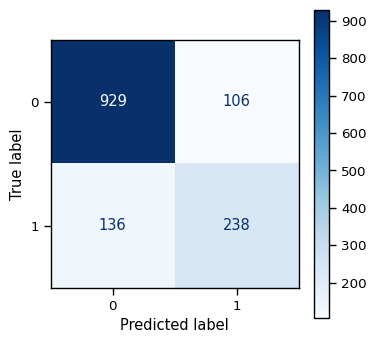

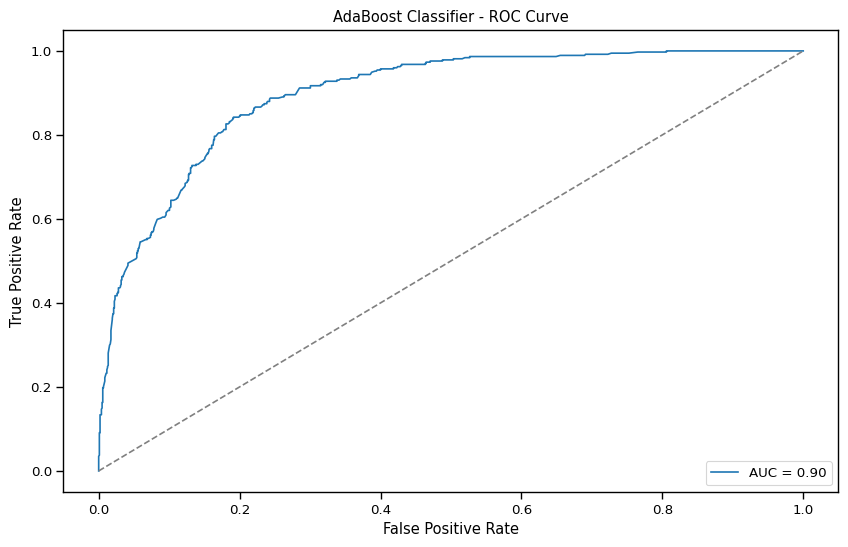

KS Statistic (AdaBoost Classifier): 0.6509
Threshold at KS: 0.4577


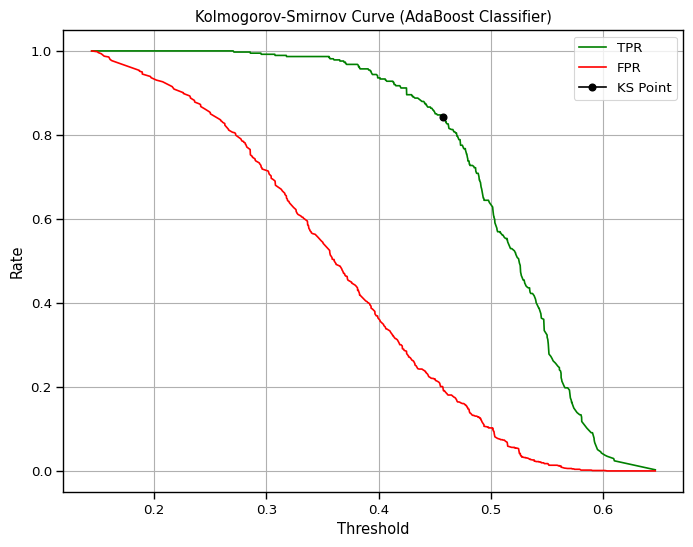

In [26]:
ab = AdaBoostClassifier()
ab.fit(X_train, y_train)

y_pred_ab = ab.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_ab))
print("\nClassification Report:\n", classification_report(y_test, y_pred_ab))

cm = confusion_matrix(y_test, y_pred_ab)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax=plt.subplots(figsize=(4, 4))
disp.plot(cmap='Blues',ax=ax)

y_proba_ab = ab.predict_proba(X_test)[:, 1]
fpr_ab, tpr_ab, _ = roc_curve(y_test, y_proba_ab)
roc_auc_ab = auc(fpr_ab, tpr_ab)

plt.figure(figsize=(10, 6))
plt.plot(fpr_ab, tpr_ab, label=f'AUC = {roc_auc_ab:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('AdaBoost Classifier - ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

fpr_ab, tpr_ab, thresholds_ab = roc_curve(y_test, y_proba_ab)

ks_statistic_ab = max(tpr_ab - fpr_ab)
ks_threshold_ab = thresholds_ab[np.argmax(tpr_ab - fpr_ab)]

print(f"KS Statistic (AdaBoost Classifier): {ks_statistic_ab:.4f}")
print(f"Threshold at KS: {ks_threshold_ab:.4f}")

plt.figure(figsize=(8,6))
plt.plot(thresholds_ab, tpr_ab, label='TPR', color='green')
plt.plot(thresholds_ab, fpr_ab, label='FPR', color='red')
plt.plot([ks_threshold_ab], [tpr_ab[np.argmax(tpr_ab - fpr_ab)]], marker='o', color='black', label='KS Point')
plt.title("Kolmogorov-Smirnov Curve (AdaBoost Classifier)")
plt.xlabel("Threshold")
plt.ylabel("Rate")
plt.legend()
plt.grid(True)
plt.show()

Accuracy: 0.8474095102909865

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.93      0.90      1035
           1       0.76      0.63      0.69       374

    accuracy                           0.85      1409
   macro avg       0.82      0.78      0.79      1409
weighted avg       0.84      0.85      0.84      1409



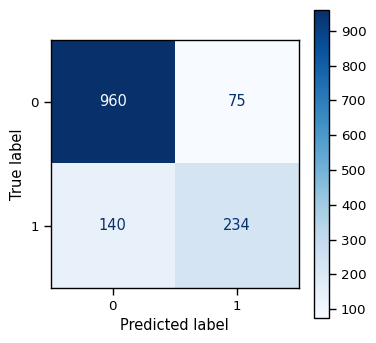

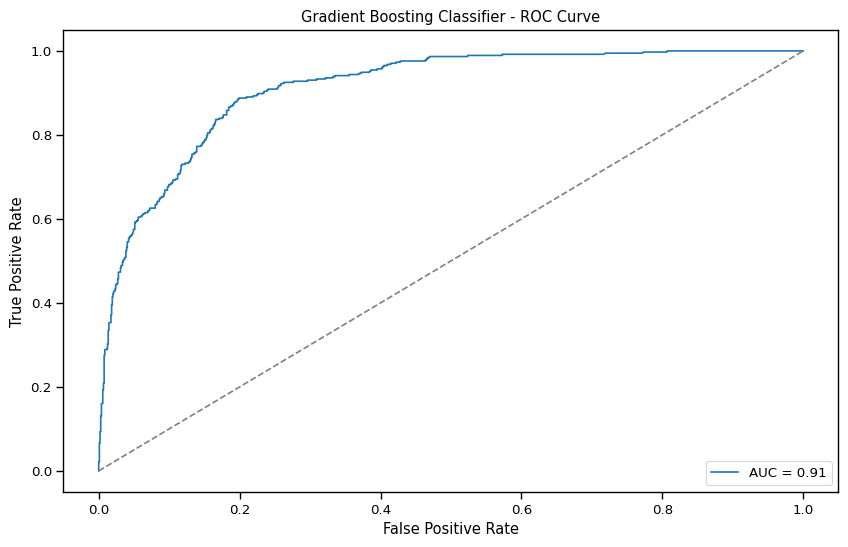

KS Statistic (Gradient Boosting Classifier): 0.6887
Threshold at KS: 0.2344


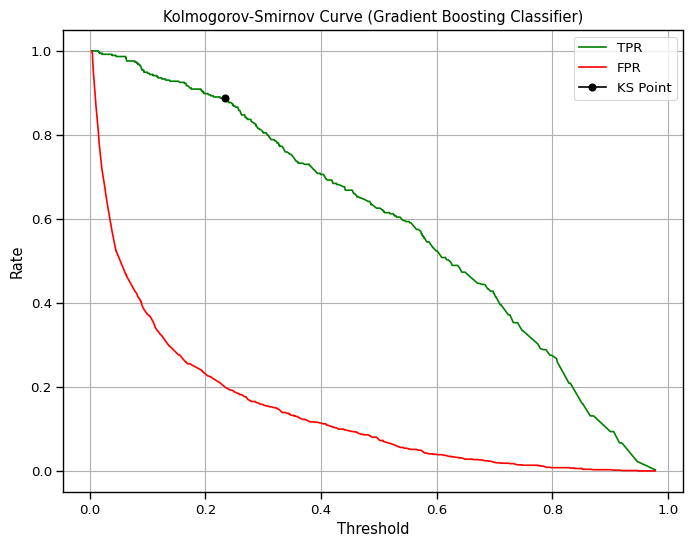

In [27]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

y_pred_gb = gb.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_gb))

cm = confusion_matrix(y_test, y_pred_gb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax=plt.subplots(figsize=(4, 4))
disp.plot(cmap='Blues',ax=ax)

y_proba_gb = gb.predict_proba(X_test)[:, 1]
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_proba_gb)
roc_auc_gb = auc(fpr_gb, tpr_gb)

plt.figure(figsize=(10, 6))
plt.plot(fpr_gb, tpr_gb, label=f'AUC = {roc_auc_gb:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('Gradient Boosting Classifier - ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

fpr_gb, tpr_gb, thresholds_gb = roc_curve(y_test, y_proba_gb)

ks_statistic_gb = max(tpr_gb - fpr_gb)
ks_threshold_gb = thresholds_gb[np.argmax(tpr_gb - fpr_gb)]

print(f"KS Statistic (Gradient Boosting Classifier): {ks_statistic_gb:.4f}")
print(f"Threshold at KS: {ks_threshold_gb:.4f}")

plt.figure(figsize=(8,6))
plt.plot(thresholds_gb, tpr_gb, label='TPR', color='green')
plt.plot(thresholds_gb, fpr_gb, label='FPR', color='red')
plt.plot([ks_threshold_gb], [tpr_gb[np.argmax(tpr_gb - fpr_gb)]], marker='o', color='black', label='KS Point')
plt.title("Kolmogorov-Smirnov Curve (Gradient Boosting Classifier)")
plt.xlabel("Threshold")
plt.ylabel("Rate")
plt.legend()
plt.grid(True)
plt.show()

Accuracy: 0.7551454932576295

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.74      0.82      1035
           1       0.53      0.80      0.63       374

    accuracy                           0.76      1409
   macro avg       0.72      0.77      0.72      1409
weighted avg       0.81      0.76      0.77      1409



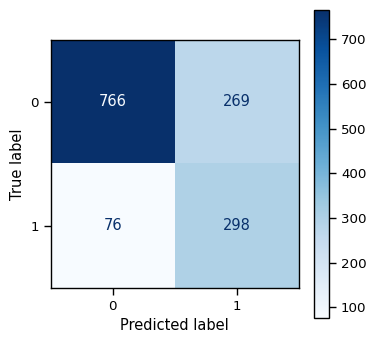

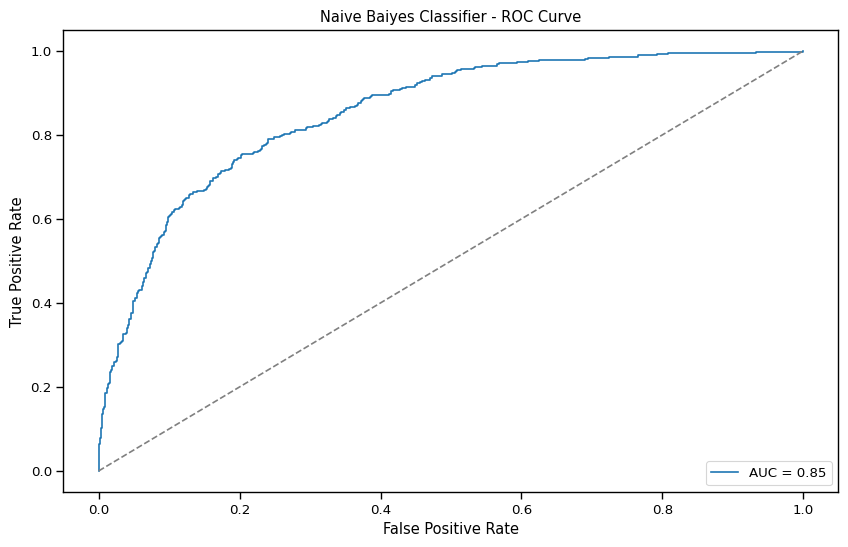

KS Statistic (Naive Baiyes Classifier): 0.5518
Threshold at KS: 0.5843


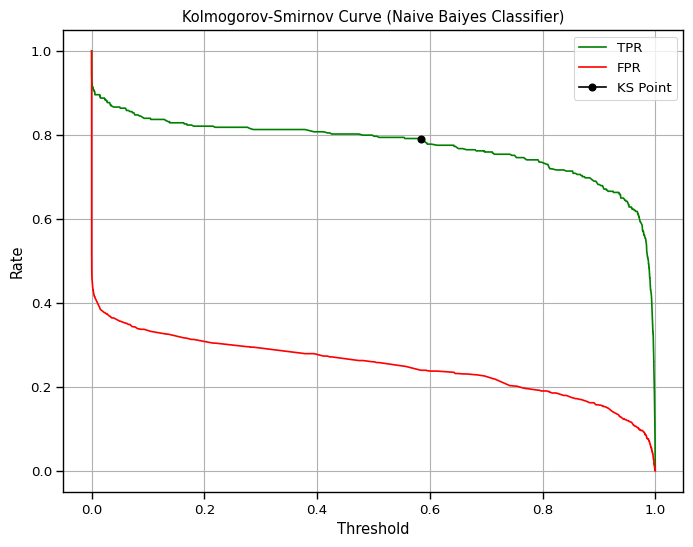

In [28]:
nb = GaussianNB()
nb.fit(X_train, y_train)

y_pred_nb = nb.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_nb))

cm = confusion_matrix(y_test, y_pred_nb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax=plt.subplots(figsize=(4, 4))
disp.plot(cmap='Blues',ax=ax)

y_proba_nb = nb.predict_proba(X_test)[:, 1]
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_proba_nb)
roc_auc_nb = auc(fpr_nb, tpr_nb)

plt.figure(figsize=(10, 6))
plt.plot(fpr_nb, tpr_nb, label=f'AUC = {roc_auc_nb:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('Naive Baiyes Classifier - ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, y_proba_nb)

ks_statistic_nb = max(tpr_nb - fpr_nb)
ks_threshold_nb = thresholds_nb[np.argmax(tpr_nb - fpr_nb)]

print(f"KS Statistic (Naive Baiyes Classifier): {ks_statistic_nb:.4f}")
print(f"Threshold at KS: {ks_threshold_nb:.4f}")

plt.figure(figsize=(8,6))
plt.plot(thresholds_nb, tpr_nb, label='TPR', color='green')
plt.plot(thresholds_nb, fpr_nb, label='FPR', color='red')
plt.plot([ks_threshold_nb], [tpr_nb[np.argmax(tpr_nb - fpr_nb)]], marker='o', color='black', label='KS Point')
plt.title("Kolmogorov-Smirnov Curve (Naive Baiyes Classifier)")
plt.xlabel("Threshold")
plt.ylabel("Rate")
plt.legend()
plt.grid(True)
plt.show()

Accuracy: 0.843860894251242

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.92      0.90      1035
           1       0.74      0.63      0.68       374

    accuracy                           0.84      1409
   macro avg       0.81      0.78      0.79      1409
weighted avg       0.84      0.84      0.84      1409



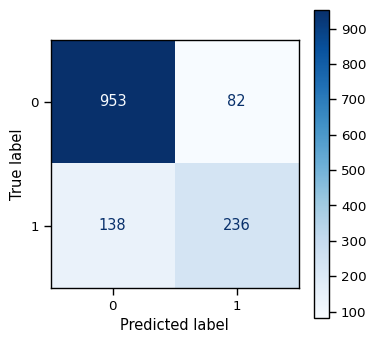

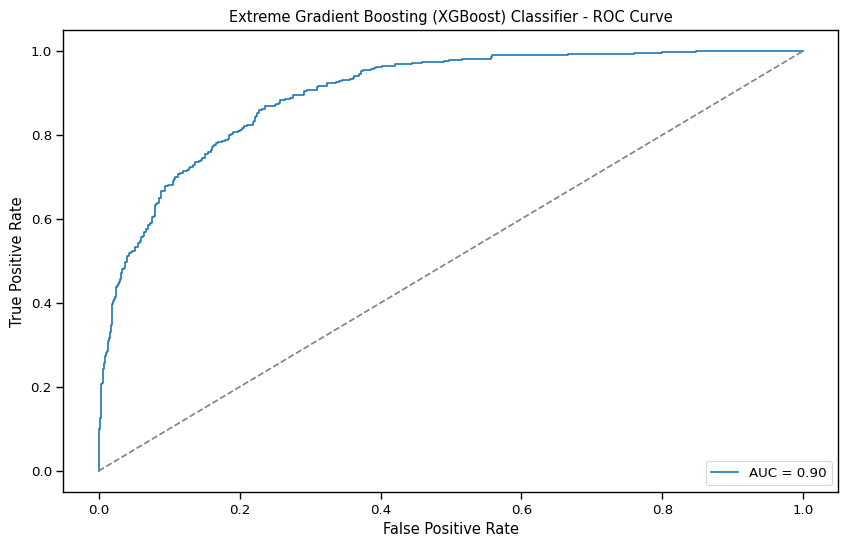

KS Statistic (Extreme Gradient Boosting (XGBoost) Classifier): 0.6323
Threshold at KS: 0.1161


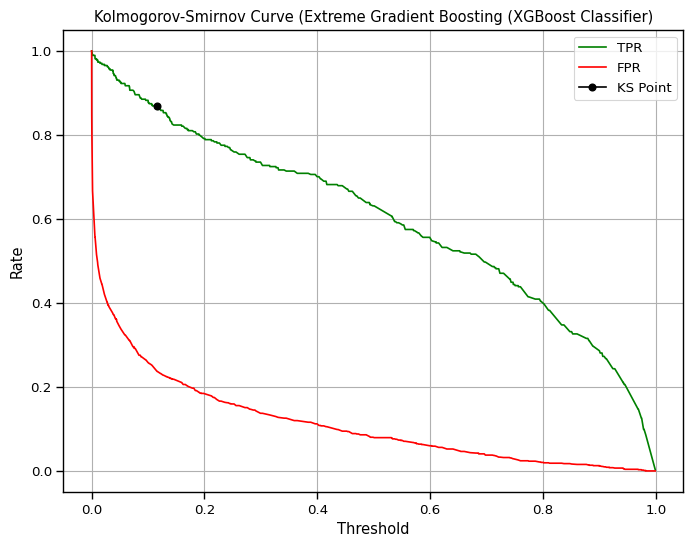

In [29]:
xg = XGBClassifier()
xg.fit(X_train, y_train)

y_pred_xg = xg.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_xg))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xg))

cm = confusion_matrix(y_test, y_pred_xg)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax=plt.subplots(figsize=(4, 4))
disp.plot(cmap='Blues',ax=ax)

y_proba_xg = xg.predict_proba(X_test)[:, 1]
fpr_xg, tpr_xg, _ = roc_curve(y_test, y_proba_xg)
roc_auc_xg = auc(fpr_xg, tpr_xg)

plt.figure(figsize=(10, 6))
plt.plot(fpr_xg, tpr_xg, label=f'AUC = {roc_auc_xg:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('Extreme Gradient Boosting (XGBoost) Classifier - ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

fpr_xg, tpr_xg, thresholds_xg = roc_curve(y_test, y_proba_xg)

ks_statistic_xg = max(tpr_xg - fpr_xg)
ks_threshold_xg = thresholds_xg[np.argmax(tpr_xg - fpr_xg)]

print(f"KS Statistic (Extreme Gradient Boosting (XGBoost) Classifier): {ks_statistic_xg:.4f}")
print(f"Threshold at KS: {ks_threshold_xg:.4f}")

plt.figure(figsize=(8,6))
plt.plot(thresholds_xg, tpr_xg, label='TPR', color='green')
plt.plot(thresholds_xg, fpr_xg, label='FPR', color='red')
plt.plot([ks_threshold_xg], [tpr_xg[np.argmax(tpr_xg - fpr_xg)]], marker='o', color='black', label='KS Point')
plt.title("Kolmogorov-Smirnov Curve (Extreme Gradient Boosting (XGBoost Classifier)")
plt.xlabel("Threshold")
plt.ylabel("Rate")
plt.legend()
plt.grid(True)
plt.show()

Learning rate set to 0.021554
0:	learn: 0.6756763	total: 59.2ms	remaining: 59.1s
1:	learn: 0.6599844	total: 60.7ms	remaining: 30.3s
2:	learn: 0.6411670	total: 62.2ms	remaining: 20.7s
3:	learn: 0.6274655	total: 63.3ms	remaining: 15.8s
4:	learn: 0.6143095	total: 64.8ms	remaining: 12.9s
5:	learn: 0.5994136	total: 66.3ms	remaining: 11s
6:	learn: 0.5856114	total: 67.8ms	remaining: 9.62s
7:	learn: 0.5728463	total: 69.3ms	remaining: 8.6s
8:	learn: 0.5610897	total: 70.8ms	remaining: 7.8s
9:	learn: 0.5489815	total: 72.6ms	remaining: 7.18s
10:	learn: 0.5372416	total: 74.4ms	remaining: 6.69s
11:	learn: 0.5280294	total: 75.9ms	remaining: 6.25s
12:	learn: 0.5185780	total: 77.4ms	remaining: 5.88s
13:	learn: 0.5092018	total: 79ms	remaining: 5.56s
14:	learn: 0.5008349	total: 80.9ms	remaining: 5.31s
15:	learn: 0.4942998	total: 82.3ms	remaining: 5.06s
16:	learn: 0.4864474	total: 83.9ms	remaining: 4.85s
17:	learn: 0.4804751	total: 85.3ms	remaining: 4.66s
18:	learn: 0.4739214	total: 86.9ms	remaining: 4.49

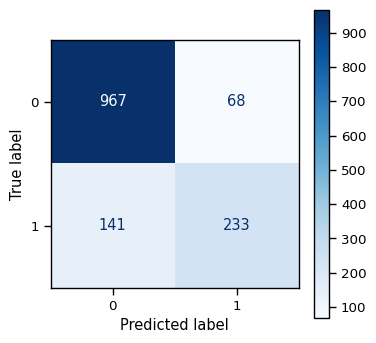

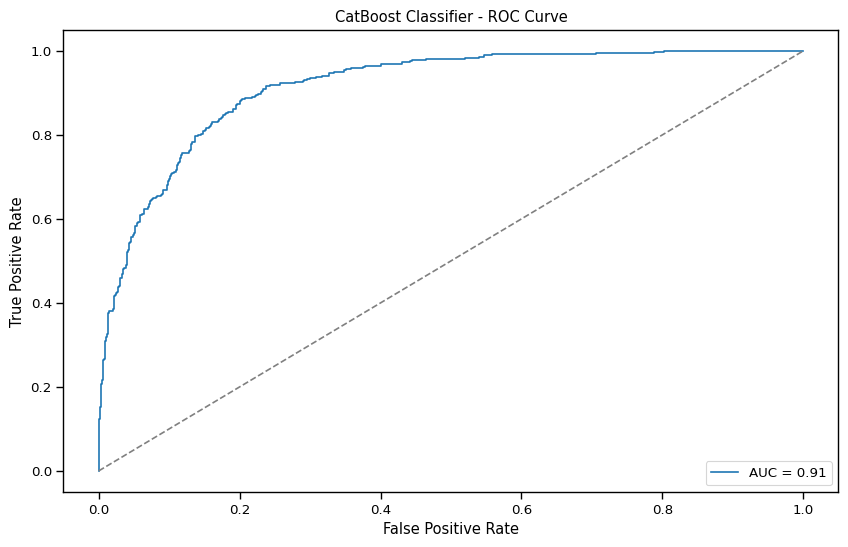

KS Statistic (CatBoost Classifier): 0.6812
Threshold at KS: 0.2122


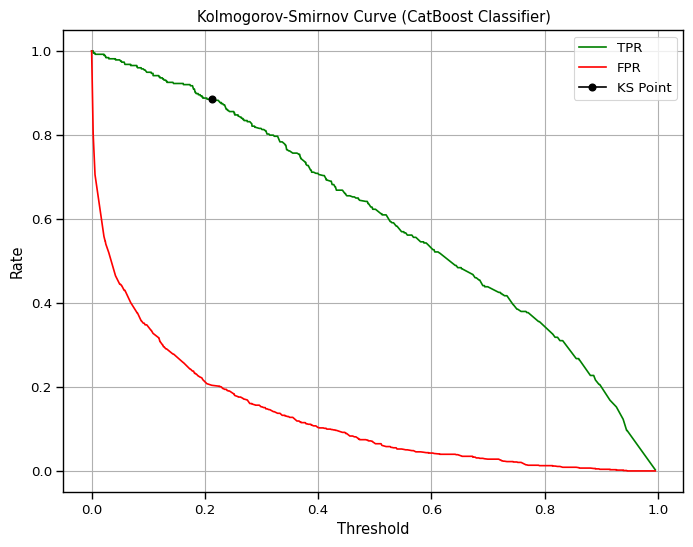

In [30]:
cb = CatBoostClassifier()
cb.fit(X_train, y_train)

y_pred_cb = cb.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_cb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_cb))

cm = confusion_matrix(y_test, y_pred_cb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax=plt.subplots(figsize=(4, 4))
disp.plot(cmap='Blues',ax=ax)

y_proba_cb = cb.predict_proba(X_test)[:, 1]
fpr_cb, tpr_cb, _ = roc_curve(y_test, y_proba_cb)
roc_auc_cb = auc(fpr_cb, tpr_cb)

plt.figure(figsize=(10, 6))
plt.plot(fpr_cb, tpr_cb, label=f'AUC = {roc_auc_cb:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('CatBoost Classifier - ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

fpr_cb, tpr_cb, thresholds_cb = roc_curve(y_test, y_proba_cb)

ks_statistic_cb = max(tpr_cb - fpr_cb)
ks_threshold_cb = thresholds_cb[np.argmax(tpr_cb - fpr_cb)]

print(f"KS Statistic (CatBoost Classifier): {ks_statistic_cb:.4f}")
print(f"Threshold at KS: {ks_threshold_cb:.4f}")

plt.figure(figsize=(8,6))
plt.plot(thresholds_cb, tpr_cb, label='TPR', color='green')
plt.plot(thresholds_cb, fpr_cb, label='FPR', color='red')
plt.plot([ks_threshold_cb], [tpr_cb[np.argmax(tpr_cb - fpr_cb)]], marker='o', color='black', label='KS Point')
plt.title("Kolmogorov-Smirnov Curve (CatBoost Classifier)")
plt.xlabel("Threshold")
plt.ylabel("Rate")
plt.legend()
plt.grid(True)
plt.show()

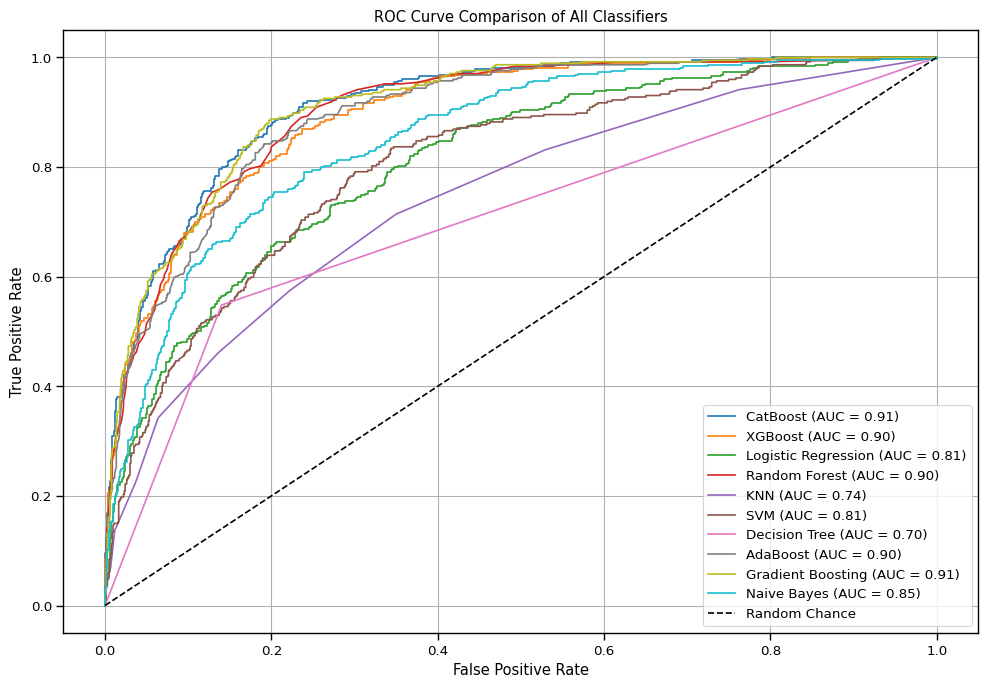

In [31]:
models_data = {
    'CatBoost': (fpr_cb, tpr_cb, roc_auc_cb),
    'XGBoost': (fpr_xg, tpr_xg, roc_auc_xg),
    'Logistic Regression': (fpr_lr, tpr_lr, roc_auc_lr),
    'Random Forest': (fpr_rf, tpr_rf, roc_auc_rf),
    'KNN': (fpr_knn, tpr_knn, roc_auc_knn),
    'SVM': (fpr_svm, tpr_svm, roc_auc_svm),
    'Decision Tree': (fpr_dt, tpr_dt, roc_auc_dt),
    'AdaBoost': (fpr_ab, tpr_ab, roc_auc_ab),
    'Gradient Boosting': (fpr_gb, tpr_gb, roc_auc_gb),
    'Naive Bayes': (fpr_nb, tpr_nb, roc_auc_nb)
}

plt.figure(figsize=(10, 7))

for name, (fpr, tpr, auc_score) in models_data.items():
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc_score:.2f})")

plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison of All Classifiers')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

In [32]:
models_preds = {
    'KNN': (y_test, y_pred_knn),
    'SVM': (y_test, y_pred_svm),
    'Random Forest': (y_test, y_pred_rf),
    'Logistic Regression': (y_test, y_pred_lr),
    'Decision Tree': (y_test, y_pred_dt),
    'AdaBoost': (y_test, y_pred_ab),
    'Gradient Boosting': (y_test, y_pred_gb),
    'CatBoost': (y_test, y_pred_cb),
    'XGBoost': (y_test, y_pred_xg),
    'Naive Bayes': (y_test, y_pred_nb)
}

metrics_data = []

for name, (true, pred) in models_preds.items():
    metrics_data.append({
        'Model': name,
        'Accuracy': accuracy_score(true, pred),
        'Precision': precision_score(true, pred),
        'Recall': recall_score(true, pred),
        'F1 Score': f1_score(true, pred)
    })

results_df = pd.DataFrame(metrics_data).set_index('Model').sort_values('F1 Score', ascending=False)
print(results_df)

                     Accuracy  Precision    Recall  F1 Score
Model                                                       
CatBoost             0.851668   0.774086  0.622995  0.690370
Gradient Boosting    0.847410   0.757282  0.625668  0.685212
XGBoost              0.843861   0.742138  0.631016  0.682081
Random Forest        0.841022   0.753378  0.596257  0.665672
AdaBoost             0.828247   0.691860  0.636364  0.662953
Naive Bayes          0.755145   0.525573  0.796791  0.633369
Logistic Regression  0.781405   0.594286  0.556150  0.574586
Decision Tree        0.777147   0.585714  0.548128  0.566298
KNN                  0.778566   0.659794  0.342246  0.450704
SVM                  0.783534   0.748201  0.278075  0.405458


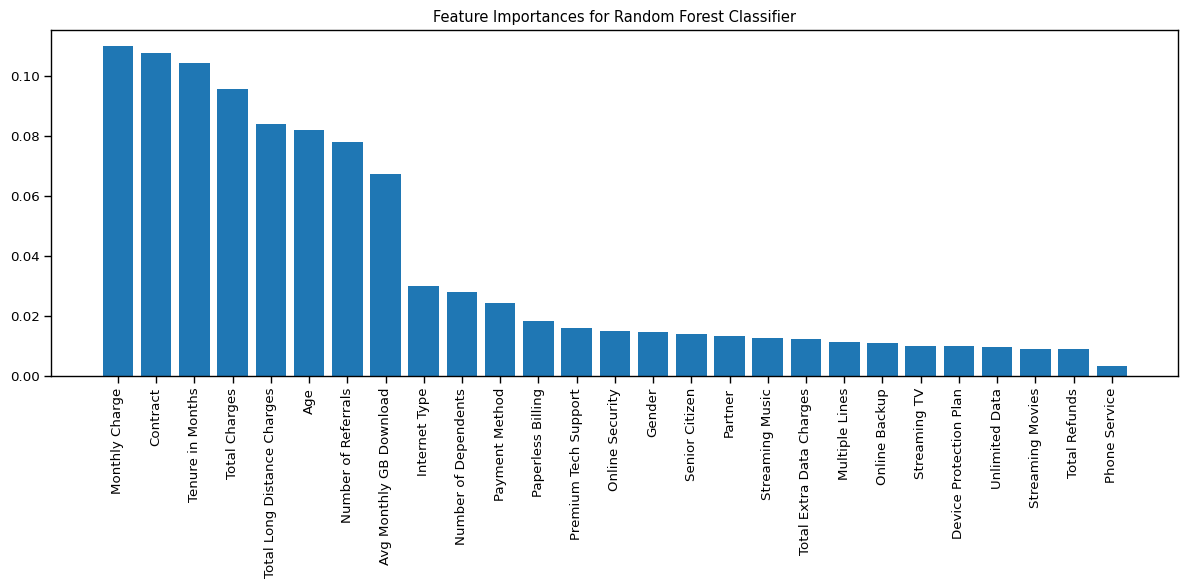

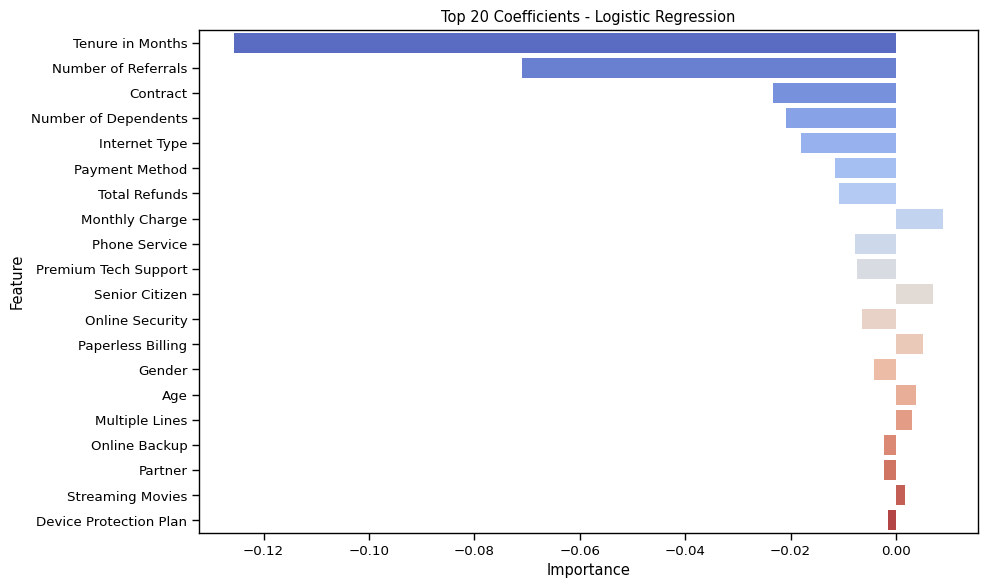

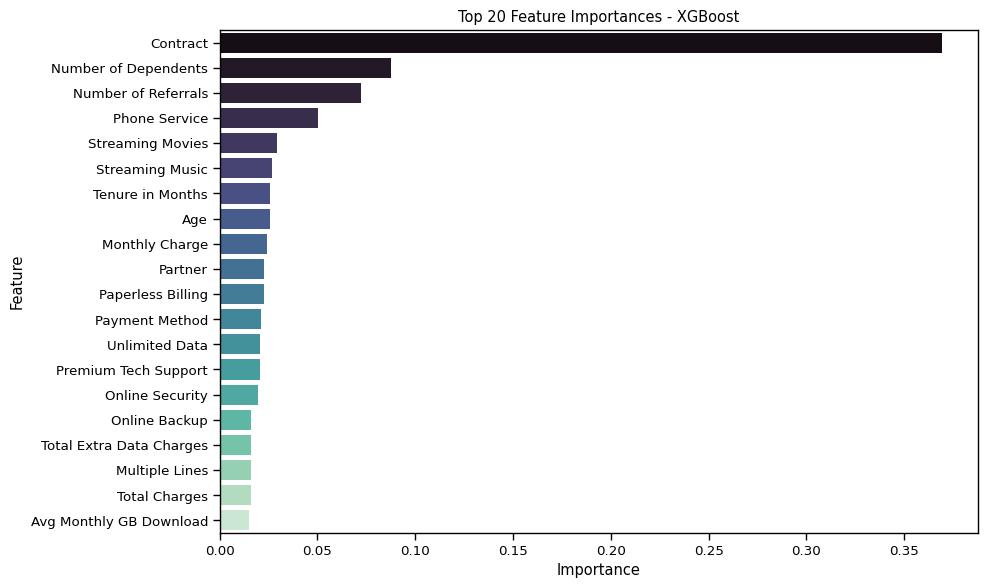

In [33]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
plt.title("Feature Importances for Random Forest Classifier")
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.tight_layout()
plt.show()

importance = lr.coef_[0]
feature_names = X_train.columns

lr_feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
lr_feat_imp_df['Absolute Importance'] = lr_feat_imp_df['Importance'].abs()
lr_feat_imp_df = lr_feat_imp_df.sort_values(by='Absolute Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=lr_feat_imp_df.head(20), x='Importance', y='Feature', palette='coolwarm')
plt.title('Top 20 Coefficients - Logistic Regression')
plt.tight_layout()
plt.show()

xg_feat_imp_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': xg.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=xg_feat_imp_df.head(20), x='Importance', y='Feature', palette='mako')
plt.title('Top 20 Feature Importances - XGBoost')
plt.tight_layout()
plt.show()

Stacking Ensemble Classification Report:

              precision    recall  f1-score   support

           0       0.87      0.93      0.90      1035
           1       0.77      0.62      0.69       374

    accuracy                           0.85      1409
   macro avg       0.82      0.78      0.79      1409
weighted avg       0.85      0.85      0.84      1409

Stacking Ensemble Accuracy: 0.8502


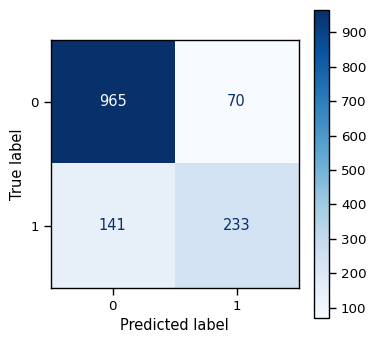

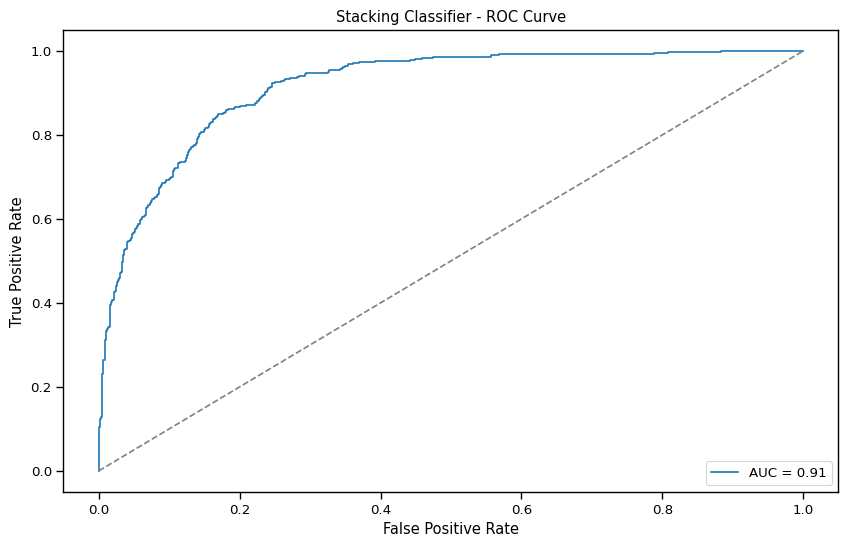

KS Statistic (Stacking Classifier): 0.6802
Threshold at KS: 0.1979


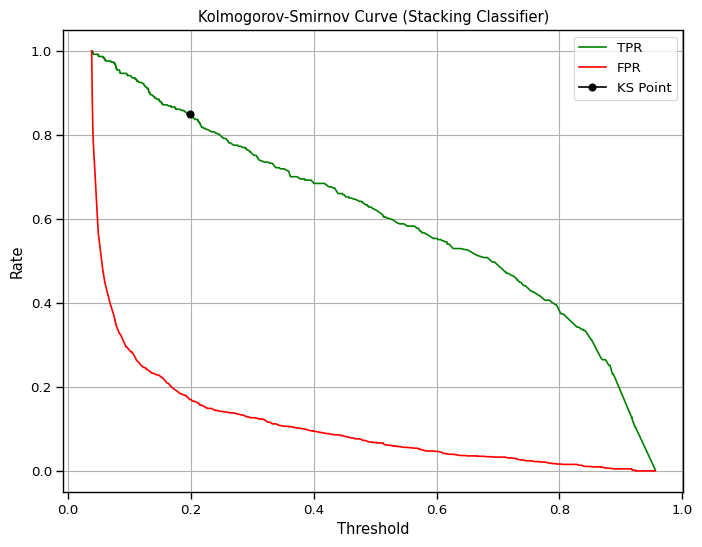

In [34]:
svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(probability=True, random_state=42))
])

lr_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LogisticRegression(max_iter=1000, random_state=42))
])

# Define base learners
base_learners = [
    ('rf', RandomForestClassifier(n_estimators=100, max_depth=8, random_state=42)),
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('svm', svm_pipeline),
    ('cb', CatBoostClassifier(n_estimators=100, learning_rate=0.1, verbose=0, random_state=42))
]

# Define meta-learner (wrapped in pipeline with scaling)
meta_learner = lr_pipeline

# Create the stacking classifier
stack_model = StackingClassifier(
    estimators=base_learners,
    final_estimator=meta_learner,
    cv=5,
    passthrough=False,
    n_jobs=-1
)

stack_model.fit(X_train, y_train)

y_pred_stack = stack_model.predict(X_test)
y_proba_stack = stack_model.predict_proba(X_test)[:, 1]

print("Stacking Ensemble Classification Report:\n")
print(classification_report(y_test, y_pred_stack))

acc_stack = accuracy_score(y_test, y_pred_stack)
print(f"Stacking Ensemble Accuracy: {acc_stack:.4f}")

cm = confusion_matrix(y_test, y_pred_stack)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax=plt.subplots(figsize=(4, 4))
disp.plot(cmap='Blues',ax=ax)

fpr_st, tpr_st, _ = roc_curve(y_test, y_proba_stack)
roc_auc_st = auc(fpr_st, tpr_st)

plt.figure(figsize=(10, 6))
plt.plot(fpr_st, tpr_st, label=f'AUC = {roc_auc_st:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('Stacking Classifier - ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

fpr_st, tpr_st, thresholds_st = roc_curve(y_test, y_proba_stack)

ks_statistic_st = max(tpr_st - fpr_st)
ks_threshold_st = thresholds_st[np.argmax(tpr_st - fpr_st)]

print(f"KS Statistic (Stacking Classifier): {ks_statistic_st:.4f}")
print(f"Threshold at KS: {ks_threshold_st:.4f}")

plt.figure(figsize=(8,6))
plt.plot(thresholds_st, tpr_st, label='TPR', color='green')
plt.plot(thresholds_st, fpr_st, label='FPR', color='red')
plt.plot([ks_threshold_st], [tpr_st[np.argmax(tpr_st - fpr_st)]], marker='o', color='black', label='KS Point')
plt.title("Kolmogorov-Smirnov Curve (Stacking Classifier)")
plt.xlabel("Threshold")
plt.ylabel("Rate")
plt.legend()
plt.grid(True)
plt.show()

In [35]:
# Compute permutation importance on the test set
result = permutation_importance(stack_model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)

# Display top features
importance_df = pd.DataFrame({
    'Feature': X_test.columns,
    'Importance': result.importances_mean
}).sort_values(by='Importance', ascending=False)

print(importance_df.head(10))


                 Feature  Importance
2               Contract    0.076224
9    Number of Referrals    0.035344
21      Tenure in Months    0.028602
6         Monthly Charge    0.016608
0                    Age    0.008304
22         Total Charges    0.007594
17        Senior Citizen    0.007239
8   Number of Dependents    0.006529
14        Payment Method    0.006458
19       Streaming Music    0.005678
